# INTERNSHIP STUDIO
# MACHINE LEARNING INTERNSHIP FINAL PROJECT


Project Title:
**Marketing Campaign for Banking Products**

Done by: Lakshmi P
         (lakshmi.ammu99@gmail.com)

My First Machine Learning Project.   


# **STEP 1**


**Import the datasets and libraries, check datatype, statistical summary, shape, null
values etc**

**Importing the libraries.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection


**Importing the excel file.  The "Bank_Personal_Loan_Modelling.xlsx" contains data on 5000 customers.**

In [ ]:
# Importing the file from the session storage(left side bar)
dt=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name="Data")
# showing first few rows of the dataset.
dt.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# checking the coloumns of the dataset.
dt.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
# checking the shape of the dataset.
dt.shape

(5000, 14)

In [ ]:
# prints information about a DataFrame including the index dtype and columns, non-null values and memory usage
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**We see that there are 12 unique features for each customer.**

In [ ]:

# checking for null values if any
dt.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# **STEP 2**  

**Check if you need to clean the data for any of the variables**

In [ ]:
# displaying the total summary of the dataset.
dt.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**From the above description we find that the Experience coloumn contains a negative value which is practically not possible.
Therefore we replace this negative experience value by the median of the coloumn.**


**Here replacing by mean is not preffered since mean is sensitive to outliers. Also it is not preffered to replace negative value with 0.**










In [ ]:
for i in range(len(dt)):
    if dt['Experience'].iloc[i] < 0:
        dt['Experience'].iloc[i]=int(dt['Experience'].median())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
#checking for negative values in the Experience coloumn 
dt[dt['Experience'] < 0]['Experience'].count()

0

**Now there are no negative values in the Experience coloumn**

In [ ]:
dt.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**After replacing by median,
Summary of dataset is checked again.
The minimum value of experience is 0 now.**

In [ ]:
exp=dt['Experience']
age= dt['Age']
correlation=exp.corr(age)
correlation

0.9771816883703435

**Later in this project, logistic regression model will be used. therefore it is not preffered to have two highly correlated coloumns.** 


**Thus the Experince coloumn is dropped(avoided from dataset).**


**Also ID column is also dropped since that is noisy signal which do not provide any significant information regarding the buying of personal loan.  The variable ID does not add any interesting information.**



In [ ]:
dt=dt.drop(['Experience','ID'],axis=1)
dt.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


# **STEP 3** 

**EDA: Study the data distribution in each attribute and target variable, share your
findings**

**● Number of unique in each column?**

**● Number of people with zero mortgage?**

**● Number of people with zero credit card spending per month?**

**● Value counts of all categorical columns.**

**● Univariate and Bivariate analysis**

In [ ]:
#finding the no. of unique enteries in each coloumn
dt.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
#finding the no. of customers with 0 mortgage
dt[dt['Mortgage'] == 0]['Mortgage'].count()

3462

In [ ]:
#finding the no. of people with 0 average credit card spending per month
dt[dt['CCAvg'] == 0]['CCAvg'].count()


106

In [ ]:
#Value counts of all categorical columns- AGE
dt['Age'].value_counts()

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

In [ ]:
#Value counts of all categorical columns - EDUCATION
dt['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
#Value counts of all categorical columns - SECURITIES ACCOUNT
dt['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
#Value counts of all categorical columns - FAMILY
dt['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
#Value counts of all categorical columns - FAMILY
dt['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
#Value counts of all categorical columns - CREDITCARD
dt['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
#Value counts of all categorical columns - ONLINE
dt['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

**Almost 50% of customers use Internet banking facility**

**Online means- Does the customer use internet banking facilities?**

In [ ]:
#Value counts of all categorical columns - ZIP CODE
dt['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

**Here the ZIP Code is considered to be nominal data since it does not provide any quantitative value.  The coloumn has 467 distinct values which is too many levels.**


**There fore it is preffered to drop the coloumn ZIP Code.**


In [ ]:
dt=dt.drop('ZIP Code',axis=1)

**UNIVARIATE ANALYSIS**

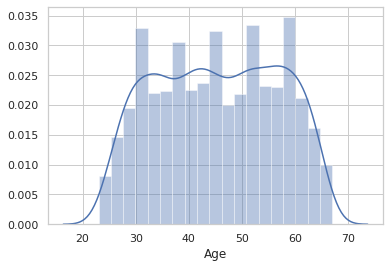

In [ ]:
sns.distplot(dt['Age'])

**The Age has a normal distribution. Majority of the customers are aged between 30 and 60.**

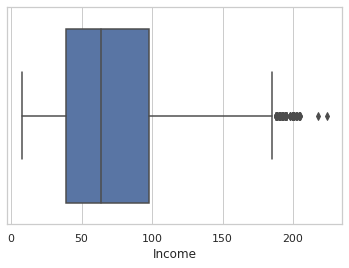

In [ ]:
sns.boxplot(dt['Income'])

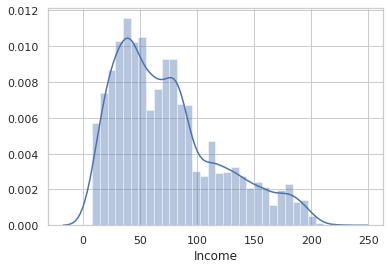

In [ ]:
sns.distplot(dt['Income'])


**Here we identify that Income data coloumn is right skewed. The data has to normalised.**

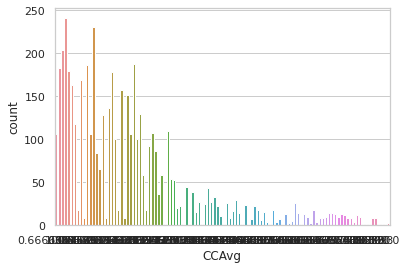

In [ ]:
sns.countplot(dt['CCAvg'])


**Credit card average has right skewed distribution**

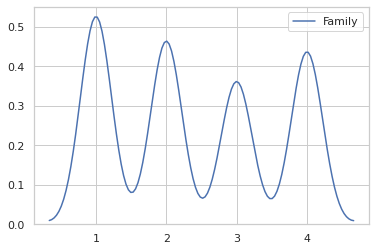

In [ ]:
sns.kdeplot(dt['Family'])

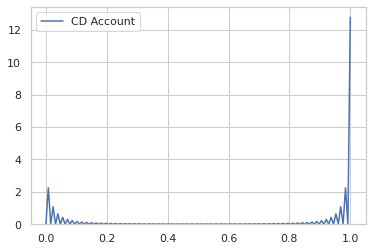

In [ ]:
sns.kdeplot(dt['CD Account'])



**CD Account means - Does the customer have a certificate of deposit (CD) account with the bank?**

**Family is a distributed data**

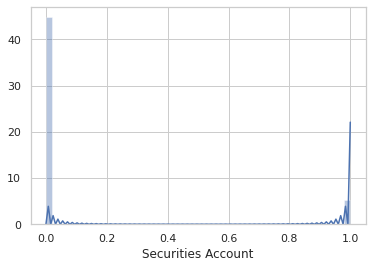

In [ ]:
sns.distplot(dt['Securities Account'])

**Securities Account means- Does the customer have a securities account with the bank?**

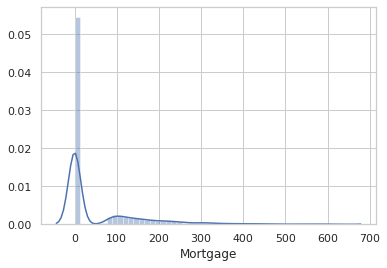

In [ ]:
sns.distplot(dt['Mortgage'])

**The mortgage has right skewed distribution. Therefore the data has to be smoothened**

**BIVARIATE ANALYSIS** 

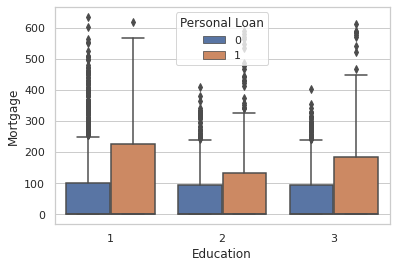

In [ ]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=dt)

**Customers with education level 1 has more mortage value and they tend to take more personal loans.**

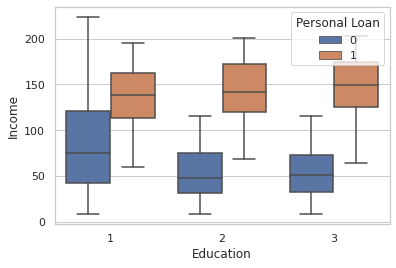

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dt)

**Customers with education level 1 has more Income. At the same time time people with high income are granted more personal loans** 

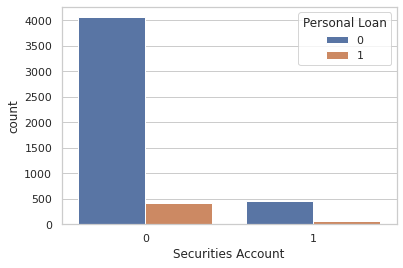

In [ ]:
sns.countplot(x='Securities Account',data=dt,hue='Personal Loan')

**Many people who have security account are not having Personal Loans**

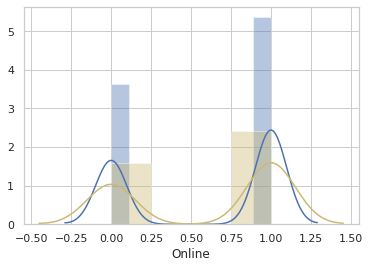

In [ ]:
sns.distplot( dt[dt["Personal Loan"] == 0]['Online'], color = 'b')
sns.distplot( dt[dt["Personal Loan"] == 1]['Online'], color = 'y')

**Customers with personal loan does not use much of the online services**

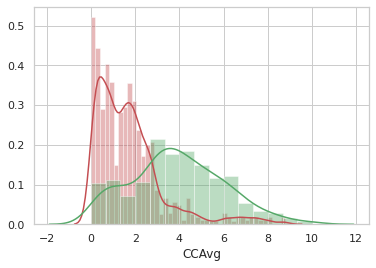

In [ ]:
sns.distplot( dt[dt["Personal Loan"] == 0]['CCAvg'], color = 'r')
sns.distplot( dt[dt["Personal Loan"] == 1]['CCAvg'], color = 'g')

**customers with personal loans has higher credit card average**

**customers without personal loans has lower value of credit card average**

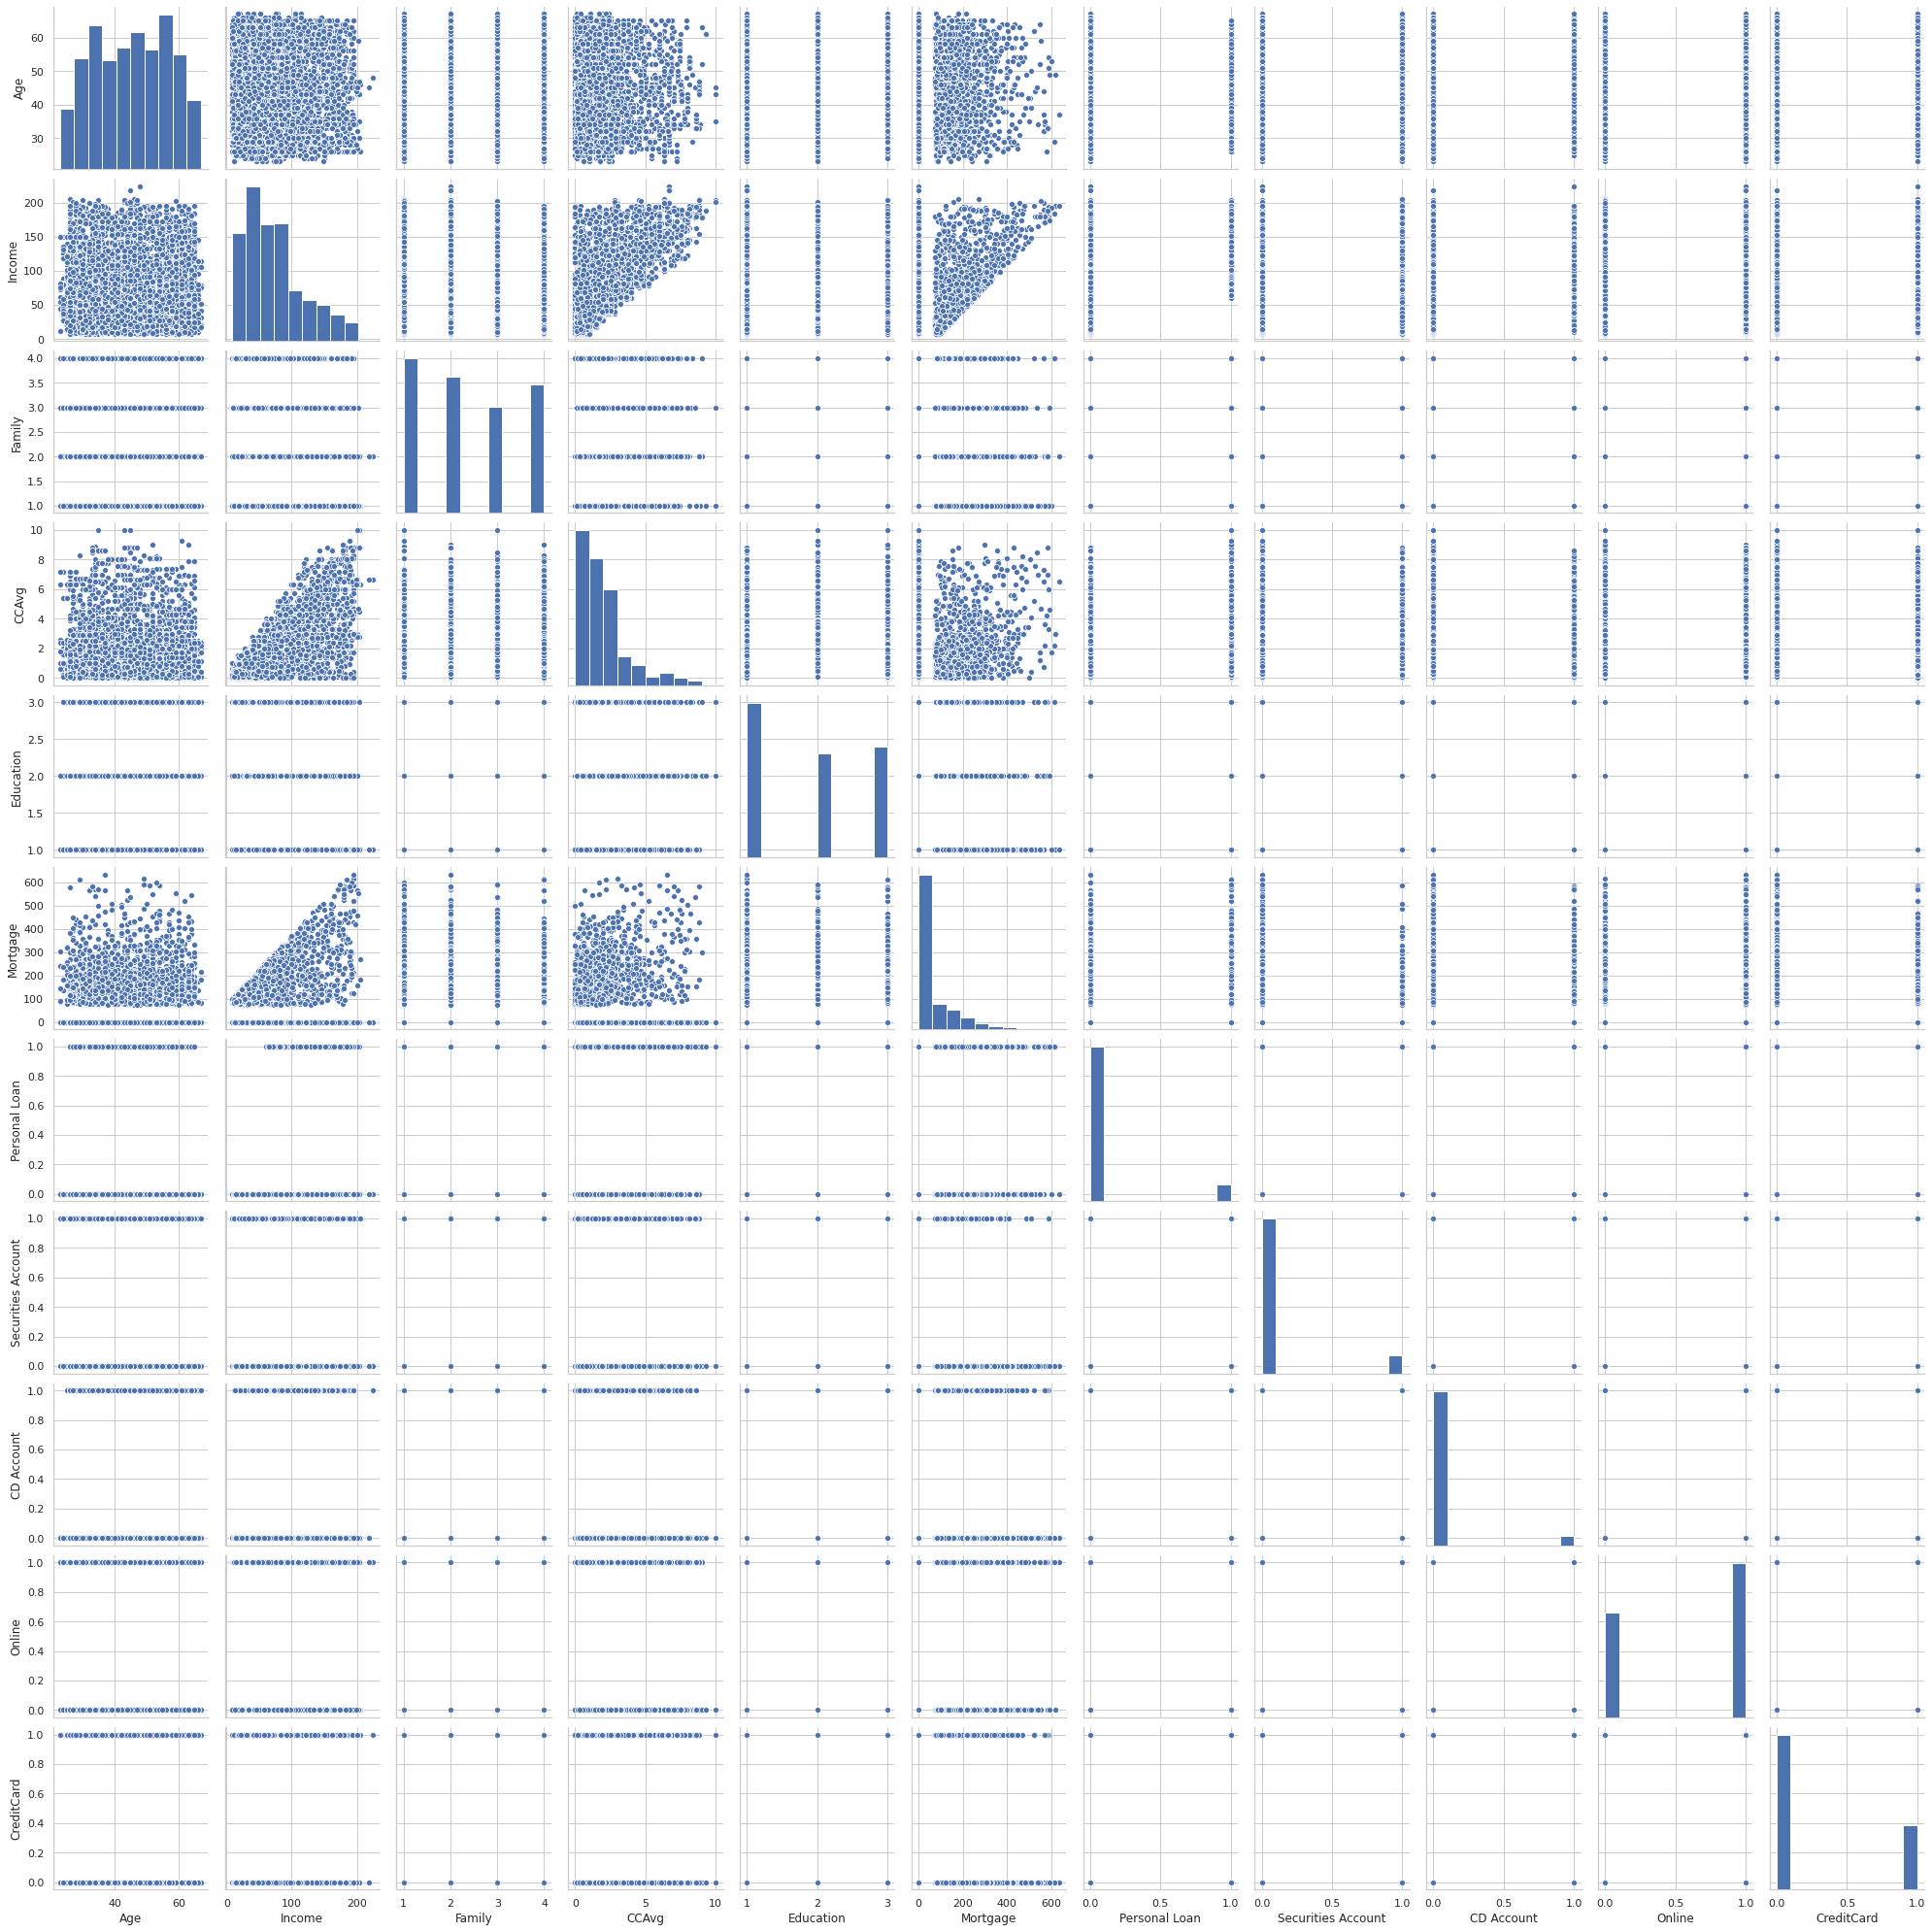

In [ ]:
sns.pairplot(dt)

**We find ouliers for the Income coloumn and CCAvg coloumn**




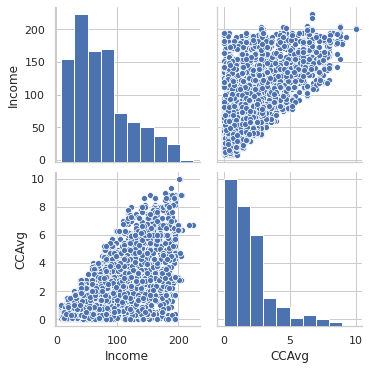

In [ ]:
sns.pairplot(dt, vars=["Income", "CCAvg"])

**Customers with higher Income has higher credit card average**

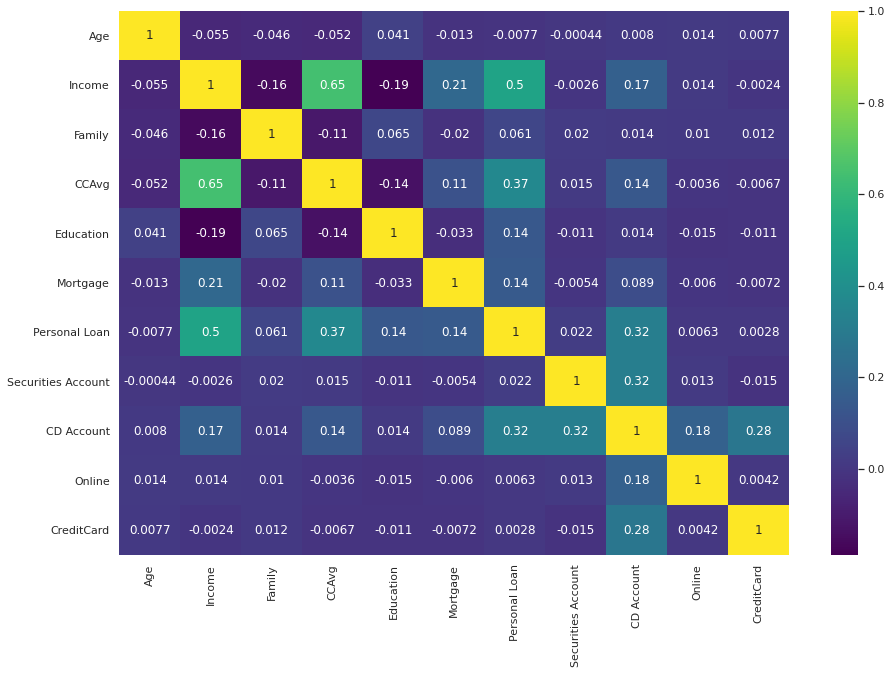

In [ ]:
plot.subplots(figsize=(15,10))
sns.heatmap(dt.corr(),cmap='viridis',annot=True)

**Income and CCAvg have moderate correlation(0.65)**

**Income and Personal loan have moderate correlation(0.5)**

**Most of the other variables seems to be independent**

# **STEP 5**: 

 **Split the data into training and test set in the ratio of 70:30
respectively**

In [ ]:
data_x = dt.loc[:, dt.columns!='Personal Loan']
data_y=dt['Personal Loan']

**Here data_y is the target variable(Personal Loan).  Later stratified sampling is applied on data_y**

**data_x are variables excluding the target variable**

# **STEP 4**: 

**Apply necessary transformations for the feature variables**

**Applying a power transform featurewise to make data more Gaussian-like.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


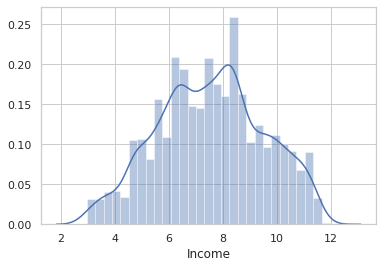

In [ ]:
from sklearn.preprocessing import PowerTransformer#
pt= PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_x['Income'].values.reshape(-1,1))
data_x['Income']=pt.transform(data_x['Income'].values.reshape(-1,1))
sns.distplot(data_x['Income'])

**Income variable is transformed using power transfomer yeo_johnson method.  The data is transformed into normally distributed data.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


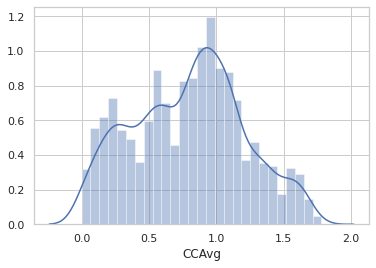

In [ ]:
pt= PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_x['CCAvg'].values.reshape(-1,1))
data_x['CCAvg']=pt.transform(data_x['CCAvg'].values.reshape(-1,1))
sns.distplot(data_x['CCAvg'])

**CCAvg variable is transformed using power transfomer yeo_johnson method. The data is transformed into normally distributed data**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


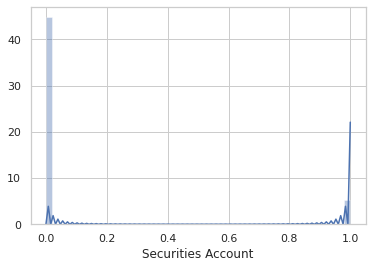

In [ ]:
from sklearn.preprocessing import QuantileTransformer
pt= QuantileTransformer()
pt.fit(data_x['Securities Account'].values.reshape(-1,1))
data_x['Securities Account']=pt.transform(data_x['Securities Account'].values.reshape(-1,1))
sns.distplot(data_x['Securities Account'])

**Securities Account variable is transformed using Quantile transfomer. The data is transformed into normally distributed data**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


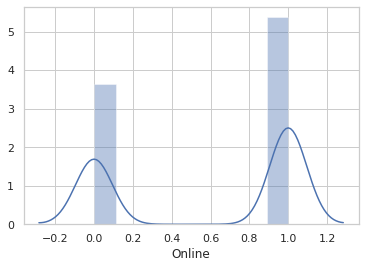

In [ ]:
from sklearn.preprocessing import QuantileTransformer
pt= QuantileTransformer()
pt.fit(data_x['Online'].values.reshape(-1,1))
data_x['Online']=pt.transform(data_x['Online'].values.reshape(-1,1))
sns.distplot(data_x['Online'])

**Online variable is transformed using Quantile transfomer. The data is transformed into normally distributed data**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


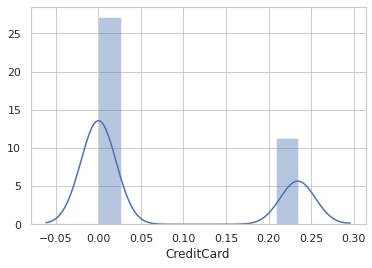

In [ ]:
pt= PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_x['CreditCard'].values.reshape(-1,1))
data_x['CreditCard']=pt.transform(data_x["CreditCard"].values.reshape(-1,1))
sns.distplot(data_x['CreditCard'])

**CreditCard variable is transformed using power transfomer yeo_johnson method. The data is transformed into normally distributed data**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


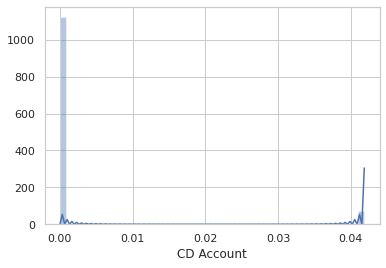

In [ ]:
pt= PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_x['CD Account'].values.reshape(-1,1))
data_x['CD Account']=pt.transform(data_x["CD Account"].values.reshape(-1,1))
sns.distplot(data_x['CD Account'])

**CD Account variable is transformed using power transfomer yeo_johnson method. The data is transformed into normally distributed data**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


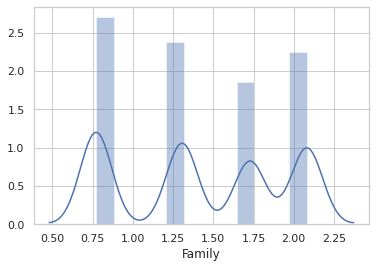

In [ ]:
pt= PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_x['Family'].values.reshape(-1,1))
data_x['Family']=pt.transform(data_x["Family"].values.reshape(-1,1))
sns.distplot(data_x['Family'])

**Family variable is transformed using power transfomer yeo_johnson method. The data is transformed into normally distributed data**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


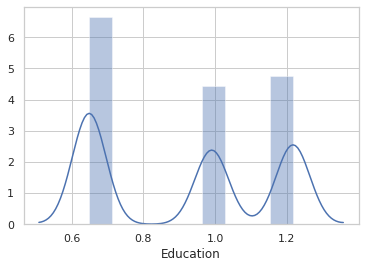

In [ ]:
pt= PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_x['Education'].values.reshape(-1,1))
data_x['Education']=pt.transform(data_x["Education"].values.reshape(-1,1))
sns.distplot(data_x['Education'])

**Education variable is transformed using power transfomer yeo_johnson method. The data is transformed into normally distributed data**

**Transforming and normalising every feature variable can help the prdication to be more PRECISE**

**Most of the classification algorithm preffers normally distributed feature input data.**

In [ ]:
data_x.head(15)

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,6.827583,2.081172,0.845150,0.648971,0,1.0,-0.0,0.0,-0.000000
1,45,5.876952,1.727775,0.814468,0.648971,0,1.0,-0.0,0.0,-0.000000
2,39,3.504287,0.772369,0.633771,0.648971,0,0.0,-0.0,0.0,-0.000000
3,35,8.983393,0.772369,1.107409,0.990403,0,0.0,-0.0,0.0,-0.000000
4,35,6.597314,2.081172,0.633771,0.990403,0,0.0,-0.0,0.0,0.234367
5,37,5.492854,2.081172,0.322048,0.990403,155,0.0,-0.0,1.0,-0.000000
6,53,7.938412,1.306455,0.814468,0.990403,0,0.0,-0.0,1.0,-0.000000
7,50,4.866205,0.772369,0.253538,1.217018,0,0.0,-0.0,0.0,0.234367
8,35,8.302424,1.727775,0.442179,0.990403,104,0.0,-0.0,1.0,-0.000000
9,34,11.100150,0.772369,1.722778,1.217018,0,0.0,-0.0,0.0,-0.000000


**Data binning (also called Discrete binning or bucketing) is a data pre-processing technique used to reduce the effects of minor observation errors.**

**The original data values which fall into a given small interval, a bin, are replaced by a value representative of that interval, often the central value. It is a form of quantization**

In [ ]:
#Binning method(label encoding for ordinal variables)
data_x['Mortgage_Int']=pd.cut(data_x["Mortgage"],
                              bins=[0,100,200,300,400,500,600,700],
                              labels=[0,1,2,3,4,5,6],
                              include_lowest=True)
                              

**Mortgage values after binning are put in a new colomn Mortage_Int, the original mortage coloumn is dropped.**

In [ ]:
data_x.drop("Mortgage", axis=1, inplace=True)

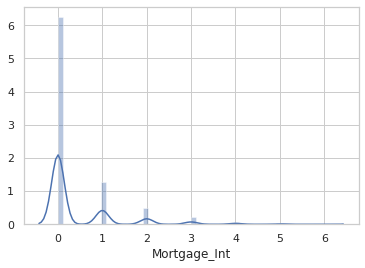

In [ ]:
sns.distplot(data_x['Mortgage_Int'])

**Mortgage values are processed and the effects of minor observation errors are reduced.**

In [ ]:
data_x.head(15)

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,6.827583,2.081172,0.845150,0.648971,1.0,-0.0,0.0,-0.000000,0
1,45,5.876952,1.727775,0.814468,0.648971,1.0,-0.0,0.0,-0.000000,0
2,39,3.504287,0.772369,0.633771,0.648971,0.0,-0.0,0.0,-0.000000,0
3,35,8.983393,0.772369,1.107409,0.990403,0.0,-0.0,0.0,-0.000000,0
4,35,6.597314,2.081172,0.633771,0.990403,0.0,-0.0,0.0,0.234367,0
5,37,5.492854,2.081172,0.322048,0.990403,0.0,-0.0,1.0,-0.000000,1
6,53,7.938412,1.306455,0.814468,0.990403,0.0,-0.0,1.0,-0.000000,0
7,50,4.866205,0.772369,0.253538,1.217018,0.0,-0.0,0.0,0.234367,0
8,35,8.302424,1.727775,0.442179,0.990403,0.0,-0.0,1.0,-0.000000,1
9,34,11.100150,0.772369,1.722778,1.217018,0.0,-0.0,0.0,-0.000000,0


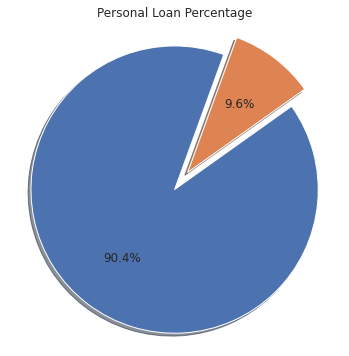

In [ ]:
tempDF=pd.DataFrame(dt['Personal Loan'].value_counts()).reset_index()
tempDF.columns=['Labels','Personal Loan']
fig,ax1=plot.subplots(figsize=(6,6))
explode=(0,0.15)
ax1.pie(tempDF['Personal Loan'],explode=explode,autopct='%1.1f%%', shadow=True,startangle=70)
ax1.axis('equal')
plot.title("Personal Loan Percentage")
plot.show()

**Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.**

**Splitting the data using stratified sampling**

**A stratified sample can provide greater precision than a simple random sample of the same size.(percentage of customers with loan remains the same)**

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(data_x,data_y,test_size=0.3,stratify=data_y,random_state=0)

**Splitting the data into training and testing data sets.** 

In [ ]:
# Feature Scaling(Normalising the data)
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(train_x)
train_x = std_scale.transform(train_x)
test_x = std_scale.transform(test_x)

 **STANDARDISATION IS FITTED INTO TRAINING DATA** 

**This step is for normalising the data**


**Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.**

**Standardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as: z = (x - u) / s**

# **STEP 6**

**Use the Logistic Regression model to predict the likelihood of a customer buying
personal loans.**

**1) LOGISTIC REGRESSION**

In [ ]:
#Fitting Logistic Regresssion to Training Set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state =0)
classifier1.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Predicting the Test Set Results
y_pred_test1 = classifier1.predict(test_x)
y_pred_test1

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_train1 = classifier1.predict(train_x)
y_pred_train1

array([0, 0, 0, ..., 0, 0, 0])

# **STEP 7**

**Print all the metrics related for evaluating the model performance.**

In [ ]:
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(classifier1, train_x , train_y, cv=8)
print('Cross-Validation Accuracy Scores', scores1)

Cross-Validation Accuracy Scores [0.96118721 0.94063927 0.94520548 0.96118721 0.9610984  0.95194508
 0.97254005 0.96796339]


In [ ]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(test_y,y_pred_test1)
cm1

array([[1336,   20],
       [  48,   96]])

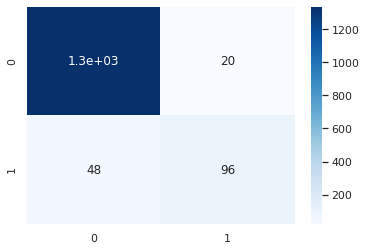

In [ ]:
sns.heatmap(cm1, annot=True, cmap='Blues')

In [ ]:
import sklearn.metrics as metrics
print("Train Accuracy :: ", metrics.accuracy_score(train_y, y_pred_train1))
print("Test Accuracy  :: ", metrics.accuracy_score(test_y, y_pred_test1))

Train Accuracy ::  0.9577142857142857
Test Accuracy  ::  0.9546666666666667


In [ ]:
#test accuracy of prediction
#it should be close to 1
from sklearn.metrics import recall_score,precision_score, f1_score, roc_auc_score
ps=precision_score(test_y,y_pred_test1) #lesser the value ,more accurate
rs=recall_score(test_y,y_pred_test1)
fs=f1_score(test_y,y_pred_test1)
roc=roc_auc_score(test_y,y_pred_test1)
print("Recall score :: ",rs)
print("Precision score :: ",ps)
print("F1 score :: ",fs)
print("Roc value :: ",roc)

Recall score ::  0.6666666666666666
Precision score ::  0.8275862068965517
F1 score ::  0.7384615384615385
Roc value ::  0.8259587020648967


# **STEP 8**

**Build various other classification algorithms and compare their performance**

**2) DECISION TREE CLASSIFIER**

In [ ]:
#Fitting DT classifier to Training Set
from sklearn.tree import DecisionTreeClassifier
model2= DecisionTreeClassifier(random_state=0, max_depth=10)

In [ ]:
model2.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#Predicting the Test Set Results
y_pred_test2= model2.predict(test_x)
y_pred_test2

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_train2 = model2.predict(train_x)
y_pred_train2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(test_y,y_pred_test2)
cm2

array([[1343,   13],
       [  15,  129]])

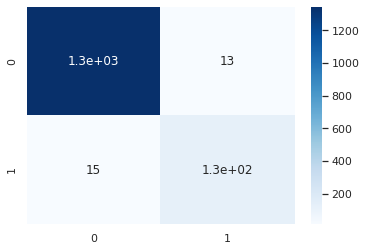

In [ ]:
sns.heatmap(cm2, annot=True, cmap='Blues')

In [ ]:
print("Train Accuracy :: ", metrics.accuracy_score(train_y, y_pred_train2))
print("Test Accuracy  :: ", metrics.accuracy_score(test_y, y_pred_test2))

Train Accuracy ::  0.9991428571428571
Test Accuracy  ::  0.9813333333333333


In [ ]:
#test accuracy of prediction
#it should be close to 1
from sklearn.metrics import recall_score,precision_score, f1_score, roc_auc_score
ps=precision_score(test_y,y_pred_test2) #lesser the value ,more accurate
rs=recall_score(test_y,y_pred_test2)
fs=f1_score(test_y,y_pred_test2)
roc=roc_auc_score(test_y,y_pred_test2)
print("Recall score :: ",rs)
print("Precision score :: ",ps)
print("F1 score :: ",fs)
print("Roc value :: ",roc)

Recall score ::  0.8958333333333334
Precision score ::  0.9084507042253521
F1 score ::  0.9020979020979022
Roc value ::  0.9431231563421829


**3) RANDOM FOREST**

In [ ]:
# Importing random forest class
from sklearn.ensemble import RandomForestClassifier
#1 Create decision tree object
model3=RandomForestClassifier(n_estimators=500,max_depth=8,random_state=0)

In [ ]:
#2 Train the model using the training sets
model3.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#Predicting the Test Set Results
y_pred_test3=model3.predict(test_x)                     
y_pred_test3

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_train3 = model3.predict(train_x)
y_pred_train3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm3= confusion_matrix(test_y,y_pred_test3)
cm3

array([[1354,    2],
       [  17,  127]])

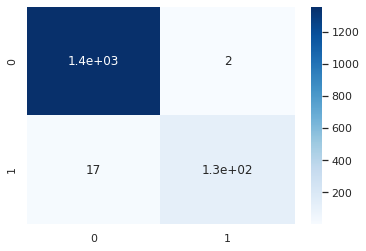

In [ ]:
sns.heatmap(cm3, annot=True, cmap='Blues')

In [ ]:
print("Train Accuracy :: ", metrics.accuracy_score(train_y, y_pred_train3))
print("Test Accuracy  :: ", metrics.accuracy_score(test_y, y_pred_test3))

Train Accuracy ::  0.9948571428571429
Test Accuracy  ::  0.9873333333333333


In [ ]:
from sklearn.metrics import recall_score,precision_score, f1_score, roc_auc_score
ps=precision_score(test_y,y_pred_test3) #lesser the value ,more accurate
rs=recall_score(test_y,y_pred_test3)
fs=f1_score(test_y,y_pred_test3)
roc=roc_auc_score(test_y,y_pred_test3)
print("Recall score :: ",rs)
print("Precision score :: ",ps)
print("F1 score :: ",fs)
print("Roc value :: ",roc)


Recall score ::  0.8819444444444444
Precision score ::  0.9844961240310077
F1 score ::  0.9304029304029303
Roc value ::  0.9402347590953786


**4) K-NEAREST NEIGHBOUR CLASSIFIER**

In [ ]:
# import the kNN model from scikit learn
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# init the model
#minkowski= distance formul and p=2 power 2 of distformula
model4= KNeighborsClassifier(n_neighbors=5)  


In [ ]:
#2 Train the model using the training sets
model4.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Predicting the Test Set Results
y_pred_test4=model4.predict(test_x)                     
y_pred_test4

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_train4 = model4.predict(train_x)
y_pred_train4

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm4= confusion_matrix(test_y,y_pred_test4)
cm4

array([[1349,    7],
       [  45,   99]])

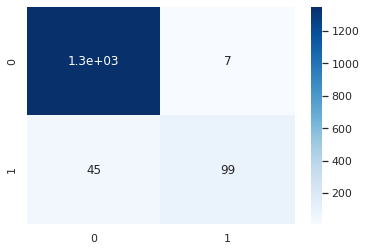

In [ ]:
sns.heatmap(cm4, annot=True, cmap='Blues')

In [ ]:
print("Train Accuracy :: ", metrics.accuracy_score(train_y, y_pred_train4))
print("Test Accuracy  :: ", metrics.accuracy_score(test_y, y_pred_test4))

Train Accuracy ::  0.968
Test Accuracy  ::  0.9653333333333334


In [ ]:
#test accuracy of prediction
#it should be close to 1
from sklearn.metrics import recall_score,precision_score, f1_score, roc_auc_score
ps=precision_score(test_y,y_pred_test4) #lesser the value ,more accurate
rs=recall_score(test_y,y_pred_test4)
fs=f1_score(test_y,y_pred_test4)
roc=roc_auc_score(test_y,y_pred_test4)
print("Recall score :: ",rs)
print("Precision score :: ",ps)
print("F1 score :: ",fs)
print("Roc value :: ",roc)

Recall score ::  0.6875
Precision score ::  0.9339622641509434
F1 score ::  0.792
Roc value ::  0.8411688790560472


**5) NAIVE-BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB  
model5 = GaussianNB()  
model5.fit(train_x, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Predicting the Test Set Results
y_pred_test5=model5.predict(test_x)                     
y_pred_test5

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_train5= model5.predict(train_x)
y_pred_train5

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm5= confusion_matrix(test_y,y_pred_test5)
cm5

array([[1296,   60],
       [  65,   79]])

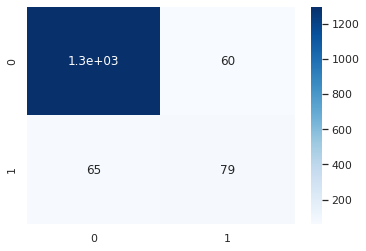

In [ ]:
sns.heatmap(cm5, annot=True, cmap='Blues')

In [ ]:
print("Train Accuracy :: ", metrics.accuracy_score(train_y, y_pred_train5))
print("Test Accuracy  :: ", metrics.accuracy_score(test_y, y_pred_test5))

Train Accuracy ::  0.9091428571428571
Test Accuracy  ::  0.9166666666666666


In [ ]:
#test accuracy of prediction
#it should be close to 1
from sklearn.metrics import recall_score,precision_score, f1_score, roc_auc_score
ps=precision_score(test_y,y_pred_test5) #lesser the value ,more accurate
rs=recall_score(test_y,y_pred_test5)
fs=f1_score(test_y,y_pred_test5)
roc=roc_auc_score(test_y,y_pred_test5)
print("Recall score :: ",rs)
print("Precision score :: ",ps)
print("F1 score :: ",fs)
print("Roc value :: ",roc)

Recall score ::  0.5486111111111112
Precision score ::  0.5683453237410072
F1 score ::  0.558303886925795
Roc value ::  0.7521816617502459


**6) SUPPORT VECTOR REGRESSION**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
model6 = SVC(kernel='linear', random_state=0)  
model6.fit(train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#Predicting the Test Set Results
y_pred_test6=model6.predict(test_x)                     
y_pred_test6

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_train6= model6.predict(train_x)
y_pred_train6

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm6= confusion_matrix(test_y,y_pred_test6)
cm6

array([[1343,   13],
       [  52,   92]])

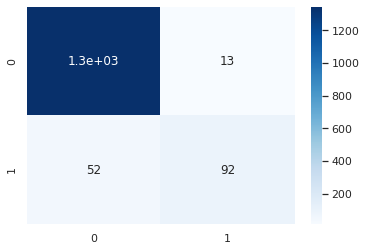

In [ ]:
sns.heatmap(cm6, annot=True, cmap='Blues')

In [ ]:
print("Train Accuracy :: ", metrics.accuracy_score(train_y, y_pred_train6))
print("Test Accuracy  :: ", metrics.accuracy_score(test_y, y_pred_test6))

Train Accuracy ::  0.9605714285714285
Test Accuracy  ::  0.9566666666666667


In [ ]:
#test accuracy of prediction
#it should be close to 1
from sklearn.metrics import recall_score,precision_score, f1_score, roc_auc_score
ps=precision_score(test_y,y_pred_test6) #lesser the value ,more accurate
rs=recall_score(test_y,y_pred_test6)
fs=f1_score(test_y,y_pred_test6)
roc=roc_auc_score(test_y,y_pred_test6)
print("Recall score :: ",rs)
print("Precision score :: ",ps)
print("F1 score :: ",fs)
print("Roc value :: ",roc)

Recall score ::  0.6388888888888888
Precision score ::  0.8761904761904762
F1 score ::  0.7389558232931727
Roc value ::  0.8146509341199606


**7) NEURAL NETWORKS**

In [ ]:
from sklearn.neural_network import MLPClassifier
model7 = MLPClassifier(hidden_layer_sizes=(50, 10))
model7.fit(train_x, train_y)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#Predicting the Test Set Results
y_pred_test7=model7.predict(test_x)                     
y_pred_test7

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_train7= model7.predict(train_x)
y_pred_train7

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm7= confusion_matrix(test_y,y_pred_test7)
cm7

array([[1345,   11],
       [  17,  127]])

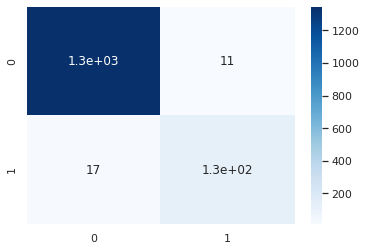

In [ ]:
sns.heatmap(cm7, annot=True, cmap='Blues')

In [ ]:
print("Train Accuracy :: ", metrics.accuracy_score(train_y, y_pred_train7))
print("Test Accuracy  :: ", metrics.accuracy_score(test_y, y_pred_test7))

Train Accuracy ::  0.9954285714285714
Test Accuracy  ::  0.9813333333333333


In [ ]:
#test accuracy of prediction
#it should be close to 1
from sklearn.metrics import recall_score,precision_score, f1_score, roc_auc_score
ps=precision_score(test_y,y_pred_test7) #lesser the value ,more accurate
rs=recall_score(test_y,y_pred_test7)
fs=f1_score(test_y,y_pred_test7)
roc=roc_auc_score(test_y,y_pred_test7)
print("Recall score :: ",rs)
print("Precision score :: ",ps)
print("F1 score :: ",fs)
print("Roc value :: ",roc)

Recall score ::  0.8819444444444444
Precision score ::  0.9202898550724637
F1 score ::  0.900709219858156
Roc value ::  0.9369161750245821


# **STEP 9**

**Give a business understanding of your model**

#**CONCLUSION**

**GOAL :**

The classification goal is to predict the likelihood of a liability customer buying personal loans.The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans.

Details of 5000 customers are given.  Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

**INSIGHTS :**

**Observations drawn from graph**:

1.	We see that there are 12 unique features for each customer.
2.	Experience column contains a negative value. Therefore replaced by median. 
3.	Experience, ZIP Code & ID column is dropped
4.	Almost 50% of customers use Internet banking facility
5.	The Age has a normal distribution (between 30 and 60)
6.	Income data column is right skewed.
7.	Mortgage has right skewed distribution(more than 70% nearer to 0)
8.	Customers with education level 1 have more mortgage value and they tend to take more personal loans.
9.	Customers with education level 1 have more Income. At the same time people with high income are granted more personal loans
10.	Many people who have security account are not having Personal Loans
11.	Customers with personal loans have higher credit card average.
12.	We find outliers for the Income column and CCAvg column
13.	Both education and family are normally distributed variables
14.	Customers with higher Income has higher credit card average
15.	Income and CCAvg have moderate correlation (0.65).  Income and Personal loan have moderate correlation (0.5).  Most of the other variables seem to be independent

**Processing of data**:
.
1.	Target variable   = Personal Loan
2.	Feature variables = All other varaibles excluding Personal Loan

3.	Stratified sampling is applied on target variable.
4.	Transformations are applied on feature variables.

5.	**Reason for applying transformations after splitting the dataset** is to prevent some part of information coming from test data to training dataset.(test data is being hided from the training data.)

6.	LOGISTIC REGRESSION REQUIRES YOUR FEATURE VARIABLE TO BE NORMALLY DISTRIBUTED(Assumption taken)

7.	Transformations are applied to Income, CCAvg, CD Account, Family, Education, Online, Securities Account (normalising every feature varaible can make the model more PRECISE)

8.	Binning applied to mortgage

9.	A stratified sample can provide greater precision than a simple random sample of the same size.(percentage of customers with loan remains the same)

10.	Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.


**COMPARISON OF DIFFERENT CLASSIFIER MODELS**



1) **LOGISTIC REGRESSION**

Test accuracy : 0.9546666666666667

Train accuray : 0.9577142857142857

Confusion matrix:

[[1336,   20],

  [  48,   96]]


Recall score ::  0.6666666666666666

Precision score ::  0.8275862068965517

F1 score ::  0.7384615384615385

Roc value ::  0.8259587020648967



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


2) **DECISION TREE CLASSIFIER**

Test accuracy : 0.9813333333333333

Train accuray : 0.9991428571428571

Confusion matrix:

[[1343,   13],

[  15,  129]])


Recall score ::  0.8958333333333334

Precision score ::  0.9084507042253521

F1 score ::  0.9020979020979022

Roc value ::  0.9431231563421829



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

3) **RANDOM FOREST CLASSIFIER**

Test accuracy : 0.9873333333333333

Train accuray : 0.9948571428571429

Confusion matrix: 

[[1354,    2],

[  17,  127]])


Recall score ::  0.8819444444444444

Precision score ::  0.9844961240310077

F1 score ::  0.9304029304029303

Roc value ::  0.9402347590953786


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

4) **K-NEAREST NEIGHBOUR CLASSIFIER**

Test accuracy : 0.9653333333333334

Train accuray : 0.968

Confusion matrix: 

[[1349,    7],

[  45,   99]])


Recall score ::  0.6875

Precision score ::  0.9339622641509434

F1 score ::  0.792

Roc value ::  0.8411688790560472


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

5) **NAIVE BAYES CLASSIFIER**

Test accuracy : 0.9166666666666666

Train accuray : 0.9091428571428571

Confusion matrix: 

[[1296,   60],

[  65,   79]])


Recall score ::  0.5486111111111112

Precision score ::  0.5683453237410072

F1 score ::  0.558303886925795

Roc value ::  0.7521816617502459

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

6) **SUPPORT VECTOR REGRESSION**

Test accuracy : 0.9566666666666667

Train accuray : 0.9605714285714285

Confusion matrix:

[[1343,   13],

[  52,   92]])

Recall score ::  0.6388888888888888

Precision score ::  0.8761904761904762

F1 score ::  0.7389558232931727

Roc value ::  0.8146509341199606


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

7) **NEURAL NETWORKS**

Test accuracy : 0.9813333333333333

Train accuray : 0.9954285714285714

Confusion matrix: 

[[1345,   11],

[  17,  127]])

Recall score ::  0.8819444444444444

Precision score ::  0.9202898550724637

F1 score ::  0.900709219858156

Roc value ::  0.9369161750245821


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!





**importance of reduced value of False Negative value** in confusion matrix:False negative (FN): Its value represents the number of malwares that have been misclassified as normal programs.

In this Machine Learning Project many statistical connections between the variables are noted and analysed.

We used 7 different classification algorithms in this project.We observe that **DECISION TREE CLASSIFIER MODEL** has highest accuracy and provides the **minimu number of false negative values** (15). Thus Decision Tree Classifier is considered to be the best model.


